In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [10]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('US Government', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1534897143.0
2018-08-21 17:19:03
Kentucky Supreme Court justice halts Louisville death penalty trial
49
2
1534720559.0
2018-08-19 16:15:59
Detroit city councilman subpoenaed over extortion allegations
170
3
1534653772.0
2018-08-18 21:42:52
Second cardinal withdraws from Ireland congress amid abuse scandals
296
4
1534645092.0
2018-08-18 19:18:12
U.S. senators demand answers from Army after Reuters report on lead poisoning
221
5
1534574066.0
2018-08-17 23:34:26
FBI probing cyber attack on congressional campaign in California
55
6
1534349003.0
2018-08-15 09:03:23
Turkey doubles tariffs on some U.S. imports over economy 'attacks'
8
7
1532376804.0
2018-07-23 13:13:24
More Than 500 BTCs Owned By Iranians Seized By US Government
89
8
1531832884.0
2018-07-17 06:08:04
US government issues security alert for downtown Juárez, Mexico, due to violence
411
9
1530779687.0
2018-07-05 01:34:47
Megaupload founder Kim Dotcom can be extradited to U.S. - New Zealand court
2539
10
1528321929.0
2

In [11]:
#New dictionnary names
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.534897e+09,2018-08-21 17:19:03,Kentucky Supreme Court justice halts Louisvill...,49
1,1.534721e+09,2018-08-19 16:15:59,Detroit city councilman subpoenaed over extort...,170
2,1.534654e+09,2018-08-18 21:42:52,Second cardinal withdraws from Ireland congres...,296
3,1.534645e+09,2018-08-18 19:18:12,U.S. senators demand answers from Army after R...,221
4,1.534574e+09,2018-08-17 23:34:26,FBI probing cyber attack on congressional camp...,55
5,1.534349e+09,2018-08-15 09:03:23,Turkey doubles tariffs on some U.S. imports ov...,8
6,1.532377e+09,2018-07-23 13:13:24,More Than 500 BTCs Owned By Iranians Seized By...,89
7,1.531833e+09,2018-07-17 06:08:04,US government issues security alert for downto...,411
8,1.530780e+09,2018-07-05 01:34:47,Megaupload founder Kim Dotcom can be extradite...,2539
9,1.528322e+09,2018-06-06 14:52:09,US government to use facial recognition techno...,74


In [12]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [13]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,2,1.534654e+09,2018-08-18 21:42:52,Second cardinal withdraws from Ireland congres...,296
1,3,1.534645e+09,2018-08-18 19:18:12,U.S. senators demand answers from Army after R...,221
2,7,1.531833e+09,2018-07-17 06:08:04,US government issues security alert for downto...,411
3,8,1.530780e+09,2018-07-05 01:34:47,Megaupload founder Kim Dotcom can be extradite...,2539
4,14,1.520916e+09,2018-03-12 21:34:25,Russian spy attack: White House says use of le...,829
5,15,1.518910e+09,2018-02-17 15:29:03,US government is 'exceptionally vulnerable' to...,478
6,17,1.517431e+09,2018-01-31 12:39:50,'A crisis for human rights': new index reveals...,234
7,18,1.516817e+09,2018-01-24 10:10:33,Wild horses facing slaughter after US governme...,301
8,19,1.516420e+09,2018-01-19 19:43:59,British 15-year-old gained access to intellige...,808
9,20,1.515374e+09,2018-01-07 17:06:59,US Government is Selling 513 Bitcoins and 512 ...,1633


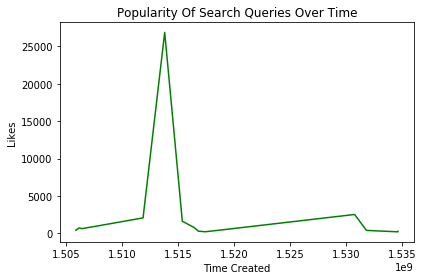

In [14]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()